In [2]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import sys
import json
import os
import io
import re
import time
from datetime import datetime, date, time, timedelta

In [3]:
def twitter_time_to_object(time_string):
    twitter_format = "%a %b %d %H:%M:%S %Y"
    match_expression = "^(.+)\s(\+[0-9][0-9][0-9][0-9])\s([0-9][0-9][0-9][0-9])$"
    match = re.search(match_expression, time_string)
    if match is not None:
        first_bit = match.group(1)
        second_bit = match.group(2)
        last_bit = match.group(3)
        new_string = first_bit + " " + last_bit
        date_object = datetime.strptime(new_string, twitter_format)
        return date_object

def twitter_time_to_unix(time_string):
    return time_object_to_unix(twitter_time_to_object(time_string))

def time_object_to_unix(time_object):
    return int(time_object.strftime("%s"))

In [4]:
def save_json(variable, filename):
    with io.open(filename, "w", encoding="utf-8") as f:
        f.write(unicode(json.dumps(variable, indent=4, ensure_ascii=False)))

def load_json(filename):
    ret = None
    if os.path.exists(filename):
        try:
            with io.open(filename, "r", encoding="utf-8") as f:
                ret = json.load(f)
        except:
            pass
    return ret

In [5]:
def get_data(fname):
    creation_dates = []
    suspicious = []
    users = []
    lower = 1470000000
    upper = 1480000000
    print("Loading " + fname)
    userlist = load_json(fname)
    if userlist is not None and len(userlist) > 0:
        print("Parsing " + fname)
        for user in userlist:
            users.append(user["screen_name"])
            if "created_at" in user and user["created_at"] is not None:
                created_at = user["created_at"]
                unix = twitter_time_to_unix(created_at)
                creation_dates.append(unix)
                if unix > lower and unix < upper:
                    suspicious.append(user["screen_name"])
    print("Done.")
    print("Found " + str(len(creation_dates)) + " accounts.")
    return creation_dates, suspicious, users

In [6]:
def plot_graph(cd, name):
    indices = []
    for n in range(len(cd)):
        indices.append(n)
    cd.reverse()
    df = pd.DataFrame({"x": indices,
                       "y": cd})
    df.plot.scatter("x", "y", figsize=(20,20), s=0.1, title=name)

Loading captures/temp/r0zetta/r0zetta
Parsing captures/temp/r0zetta/r0zetta
Done.
Found 1200 accounts.


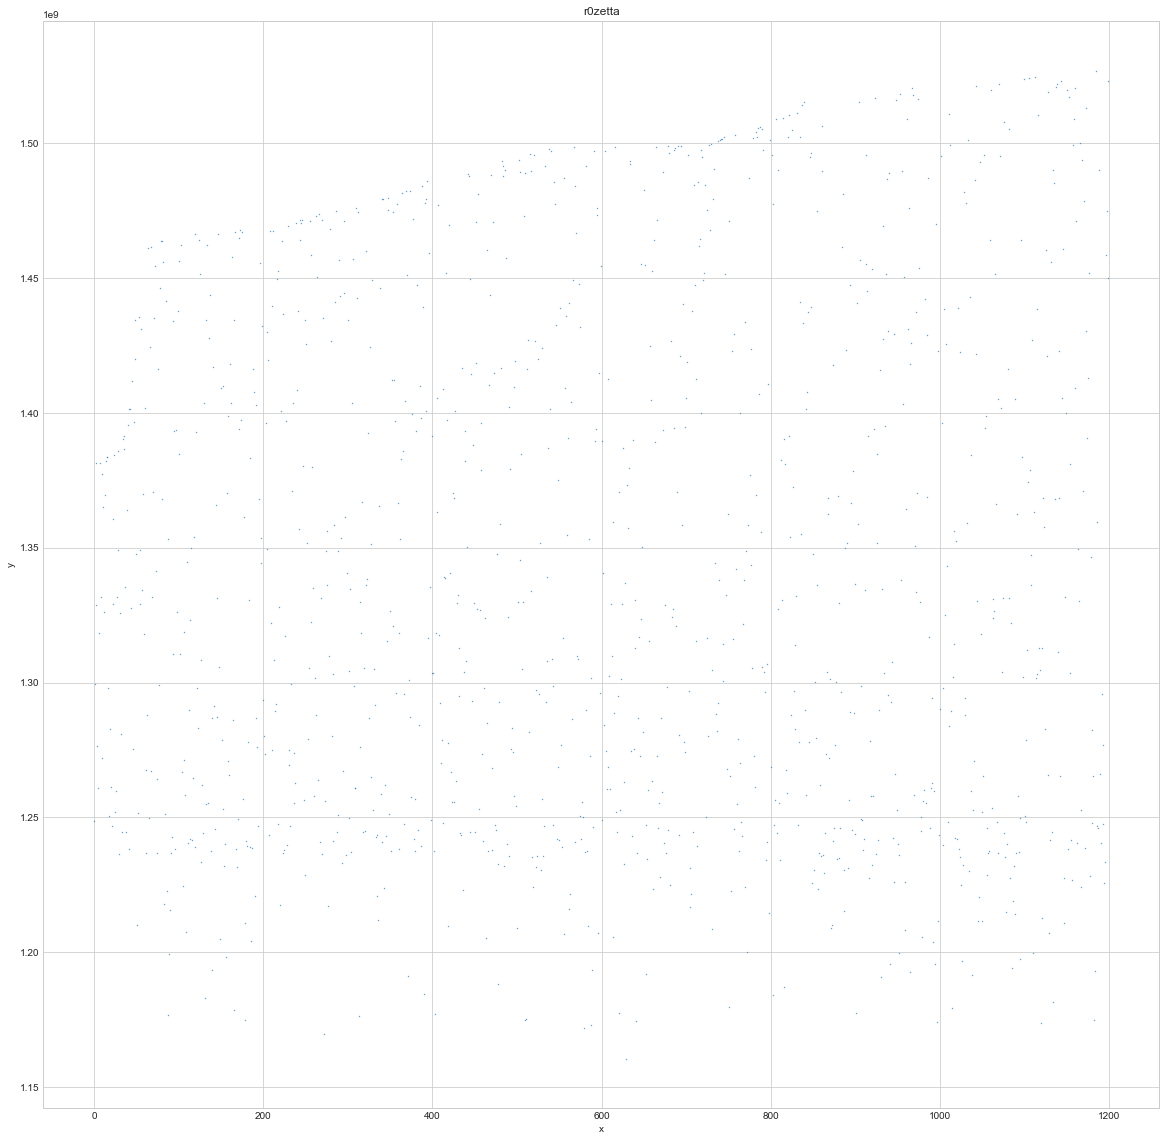

In [8]:
names = ["r0zetta"]
for name in names:
    filename = os.path.join("captures", "temp", name, name)
    if os.path.exists(filename):
        creation_dates, suspicious, users = get_data(filename)
        plot_graph(creation_dates, name)